In [23]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

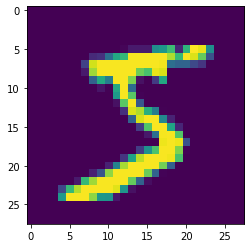

In [24]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [25]:
#check image shape
X_train[0].shape

(28, 28)

In [26]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [27]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [29]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 162s 3ms/step - loss: 0.2078 - accuracy: 0.9535 - val_loss: 0.0847 - val_accuracy: 0.9725
Epoch 2/3
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 3/3
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0880 - val_accuracy: 0.9744


[[5.90194671e-10 5.18455018e-15 3.16545119e-08 1.48124556e-07
  6.82266193e-15 4.45929535e-12 8.25229211e-18 9.99999762e-01
  1.11542574e-10 7.85399834e-09]
 [2.51299724e-07 5.97894143e-08 9.99986172e-01 7.73000102e-06
  2.29796217e-12 3.76696721e-12 1.74241882e-06 3.01709213e-11
  3.90964078e-06 1.34688733e-14]
 [1.20214668e-06 9.99928832e-01 1.16097726e-05 4.07898114e-07
  2.81239481e-05 1.02003523e-05 9.45918873e-06 6.75039416e-07
  9.21260471e-06 3.76075207e-07]
 [9.99899864e-01 1.60246868e-11 9.25487475e-05 3.43655193e-09
  5.35013767e-09 2.20576624e-09 2.92918162e-06 1.49408530e-09
  3.96013917e-07 4.33101923e-06]]


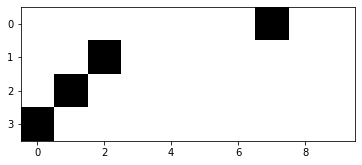

In [42]:
#predict first 4 images in the test set
abc = model.predict(X_test[:4])
print(abc)
plt.imshow(abc, cmap = plt.cm.binary)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


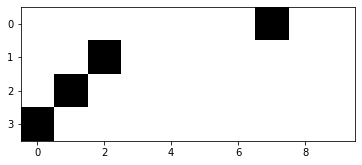

In [43]:
#actual results for first 4 images in test set
td = y_test[:4]
print(td)
plt.imshow(td, cmap = plt.cm.binary)
plt.show()